In [12]:
import pandas as pd

In [86]:
import seaborn
seaborn.set()

/Users/alexeygilman/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [14]:
data = pd.read_csv("4xy5-26gy.csv")

In [23]:
data.head()

,date,fremont_bridge_nb,fremont_bridge_sb
0,2012-10-03T02:00:00.000,1,1
1,2012-10-05T01:00:00.000,4,4
2,2012-10-05T03:00:00.000,2,2
3,2012-10-05T23:00:00.000,16,16
4,2012-10-07T22:00:00.000,9,9


In [20]:
data.shape

(1000, 3)

In [22]:
data.dtypes

date                 object
fremont_bridge_nb     int64
fremont_bridge_sb     int64
dtype: object

In [26]:
data.tail()

,date,fremont_bridge_nb,fremont_bridge_sb
995,2015-08-14T16:00:00.000,43,90
996,2015-08-05T06:00:00.000,117,62
997,2015-08-05T14:00:00.000,44,60
998,2015-08-15T06:00:00.000,9,25
999,2015-08-16T12:00:00.000,110,92


In [88]:
times = pd.DatetimeIndex(data["date"])

In [41]:
data["year"] = times.year

In [48]:
data["hour"] = times.hour

In [49]:
data.head()

,date,fremont_bridge_nb,fremont_bridge_sb,year,hour
0,2012-10-03T02:00:00.000,1,1,2012,2
1,2012-10-05T01:00:00.000,4,4,2012,1
2,2012-10-05T03:00:00.000,2,2,2012,3
3,2012-10-05T23:00:00.000,16,16,2012,23
4,2012-10-07T22:00:00.000,9,9,2012,22


In [50]:
data["count"] = data["fremont_bridge_nb"]

In [51]:
data.head()

,date,fremont_bridge_nb,fremont_bridge_sb,year,hour,count
0,2012-10-03T02:00:00.000,1,1,2012,2,1
1,2012-10-05T01:00:00.000,4,4,2012,1,4
2,2012-10-05T03:00:00.000,2,2,2012,3,2
3,2012-10-05T23:00:00.000,16,16,2012,23,16
4,2012-10-07T22:00:00.000,9,9,2012,22,9


In [64]:
# data = data.drop("fremont_bridge_sb",1)
# used the line above to drop two columns since I already have "count"

In [68]:
data.head(3)

,date,year,hour,count
0,2012-10-03T02:00:00.000,2012,2,1
1,2012-10-05T01:00:00.000,2012,1,4
2,2012-10-05T03:00:00.000,2012,3,2


In [77]:
if data["year"] == "2015":
    return data.index

#hmm, not sure what I am doing wrong here... 

SyntaxError: 'return' outside function (<ipython-input-77-6efc33656c5f>, line 2)

In [81]:
data['year'] == 2015

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970     True
971     True
972     True
973     True
974     True
975    False
976     True
977     True
978     True
979     True
980     True
981     True
982    False
983     True
984    False
985     True
986     True
987    False
988     True
989     True
990    False
991     True
992     True
993     True
994     True
995     True
996     True
997     True
998     True
999     True
Name: year, dtype: bool

In [83]:
data = data[data['year'] == 2015]

In [84]:
data.head(3)

,date,year,hour,count
37,2015-07-30T05:00:00.000,2015,5,20
38,2015-07-11T20:00:00.000,2015,20,29
39,2015-07-31T19:00:00.000,2015,19,88


In [89]:
data["month"] = times.month 

/Users/alexeygilman/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [90]:
data.head(3)

,date,year,hour,count,month
37,2015-07-30T05:00:00.000,2015,5,20,7
38,2015-07-11T20:00:00.000,2015,20,29,7
39,2015-07-31T19:00:00.000,2015,19,88,7


In [92]:
data.shape

(893, 5)

In [95]:
grouped_by_hour = data.groupby(times.hour)['count'].sum()

In [100]:
grouped_by_hour

0       307
1       164
2        98
3        81
4       184
5       892
6      3357
7      8747
8     10889
9      4974
10     2670
11     2282
12     2309
13     2590
14     2246
15     3251
16     3992
17     6021
18     4165
19     2759
20     2129
21     1463
22      911
23      655
Name: count, dtype: int64

In [101]:
%matplotlib inline

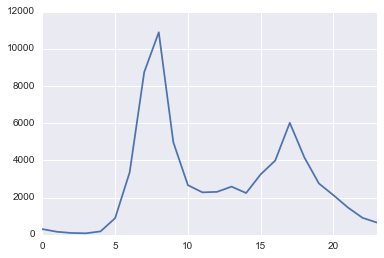

In [102]:
grouped_by_hour.plot()
#counts by hour in 2015 

In [105]:
grpd_hour_Ave = data.groupby(times.hour)['count'].mean()

In [106]:
grpd_hour_Ave

0       8.297297
1       4.685714
2       3.161290
3       2.531250
4       5.111111
5      20.744186
6      86.076923
7     224.282051
8     279.205128
9     134.432432
10     70.263158
11     58.512821
12     60.763158
13     64.750000
14     62.388889
15     77.404762
16    114.057143
17    154.384615
18    122.500000
19     78.828571
20     56.026316
21     39.540541
22     27.606061
23     15.975610
Name: count, dtype: float64

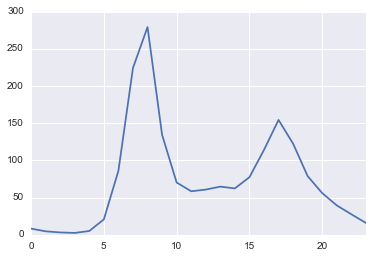

In [107]:
grpd_hour_Ave.plot()

In [ ]:
#The 8th hour is the busiest hour of the day! 